<a href="https://colab.research.google.com/github/KeyserSoze7/Oral-Diseases-Detection-/blob/main/Oral_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall torch
!pip install torch

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.5.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
  Successfully uninstalled torch-2.5.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms.functional as F

# Configuration

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 1e-4
IMG_SIZE = 224
NUM_CLASSES = 2  # Classes: A and B

# Data Transforms

In [ ]:

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset and Dataloader

In [ ]:

train_dataset = datasets.ImageFolder(root='/content/drive/My Drive/Oral Dataset/TRAIN', transform=train_transform)
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Oral Dataset/TEST', transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Class-to-Index Mapping:", train_dataset.class_to_idx)

Class-to-Index Mapping: {'Caries': 0, 'Gingivitis': 1}


# Model Setup

In [ ]:
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, NUM_CLASSES)
model = model.to(DEVICE)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Training Loop

In [ ]:

def train_model(model, loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0
        for images, labels in loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader):.4f}, Accuracy: {correct/total:.4f}")


# Training the Model


In [ ]:
train_model(model, train_loader, criterion, optimizer, EPOCHS)

Epoch [1/20], Loss: 0.3906, Accuracy: 0.8708
Epoch [2/20], Loss: 0.1471, Accuracy: 0.9549
Epoch [3/20], Loss: 0.0919, Accuracy: 0.9731
Epoch [4/20], Loss: 0.0795, Accuracy: 0.9751
Epoch [5/20], Loss: 0.0663, Accuracy: 0.9778
Epoch [6/20], Loss: 0.0630, Accuracy: 0.9764
Epoch [7/20], Loss: 0.0577, Accuracy: 0.9812
Epoch [8/20], Loss: 0.0484, Accuracy: 0.9805
Epoch [9/20], Loss: 0.0427, Accuracy: 0.9845
Epoch [10/20], Loss: 0.0505, Accuracy: 0.9832
Epoch [11/20], Loss: 0.0495, Accuracy: 0.9798
Epoch [12/20], Loss: 0.0446, Accuracy: 0.9852
Epoch [13/20], Loss: 0.0422, Accuracy: 0.9812
Epoch [14/20], Loss: 0.0411, Accuracy: 0.9818
Epoch [15/20], Loss: 0.0372, Accuracy: 0.9852
Epoch [16/20], Loss: 0.0341, Accuracy: 0.9832
Epoch [17/20], Loss: 0.0424, Accuracy: 0.9852
Epoch [18/20], Loss: 0.0311, Accuracy: 0.9852
Epoch [19/20], Loss: 0.0370, Accuracy: 0.9832
Epoch [20/20], Loss: 0.0352, Accuracy: 0.9838


# Evaluation & Testing

In [ ]:
def evaluate_model(model, loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels


In [ ]:
preds, labels = evaluate_model(model, test_loader)

# Classification report and Confusion Matrix **bold text**

Classification Report:
              precision    recall  f1-score   support

      Caries       0.96      0.99      0.97       204
  Gingivitis       0.98      0.96      0.97       204

    accuracy                           0.97       408
   macro avg       0.97      0.97      0.97       408
weighted avg       0.97      0.97      0.97       408



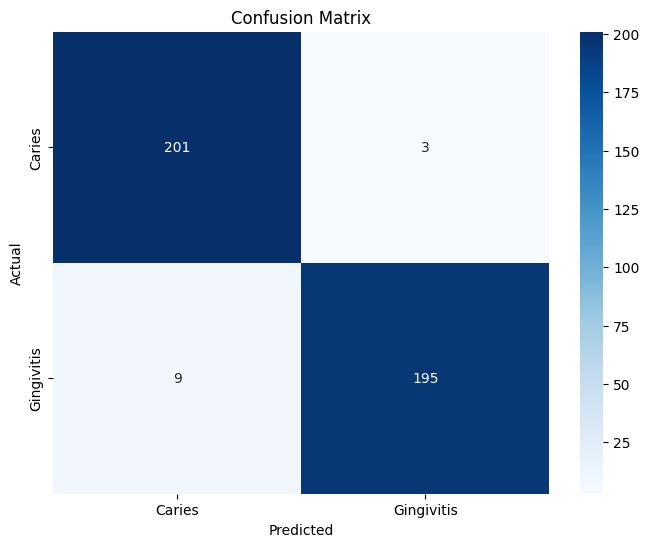

In [ ]:
print("Classification Report:")
print(classification_report(labels, preds, target_names=train_dataset.classes))


conf_matrix = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Saving the Model

In [ ]:
torch.save(model.state_dict(), 'oral_disease_model.pth')
print("Model saved as oral_disease_model.pth")

Model saved as oral_disease_model.pth


# Sample Output

In [ ]:


# Function to visualize test images with predictions
def visualize_predictions(model, loader, class_mapping, num_images=5):
    model.eval()  # Setting the model to evaluation mode
    images_shown = 0

    plt.figure(figsize=(15, 15))
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown >= num_images:
                    break

                # Converting image tensor to a format suitable for displaying
                img = F.to_pil_image(images[i].cpu())

                # getting actual and predicted class names
                actual_class = class_mapping[labels[i].item()]
                predicted_class = class_mapping[predicted[i].item()]

                # Plotting the image with the title
                plt.subplot(num_images // 2 + 1, 2, images_shown + 1)
                plt.imshow(img)
                plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
                plt.axis('off')

                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()




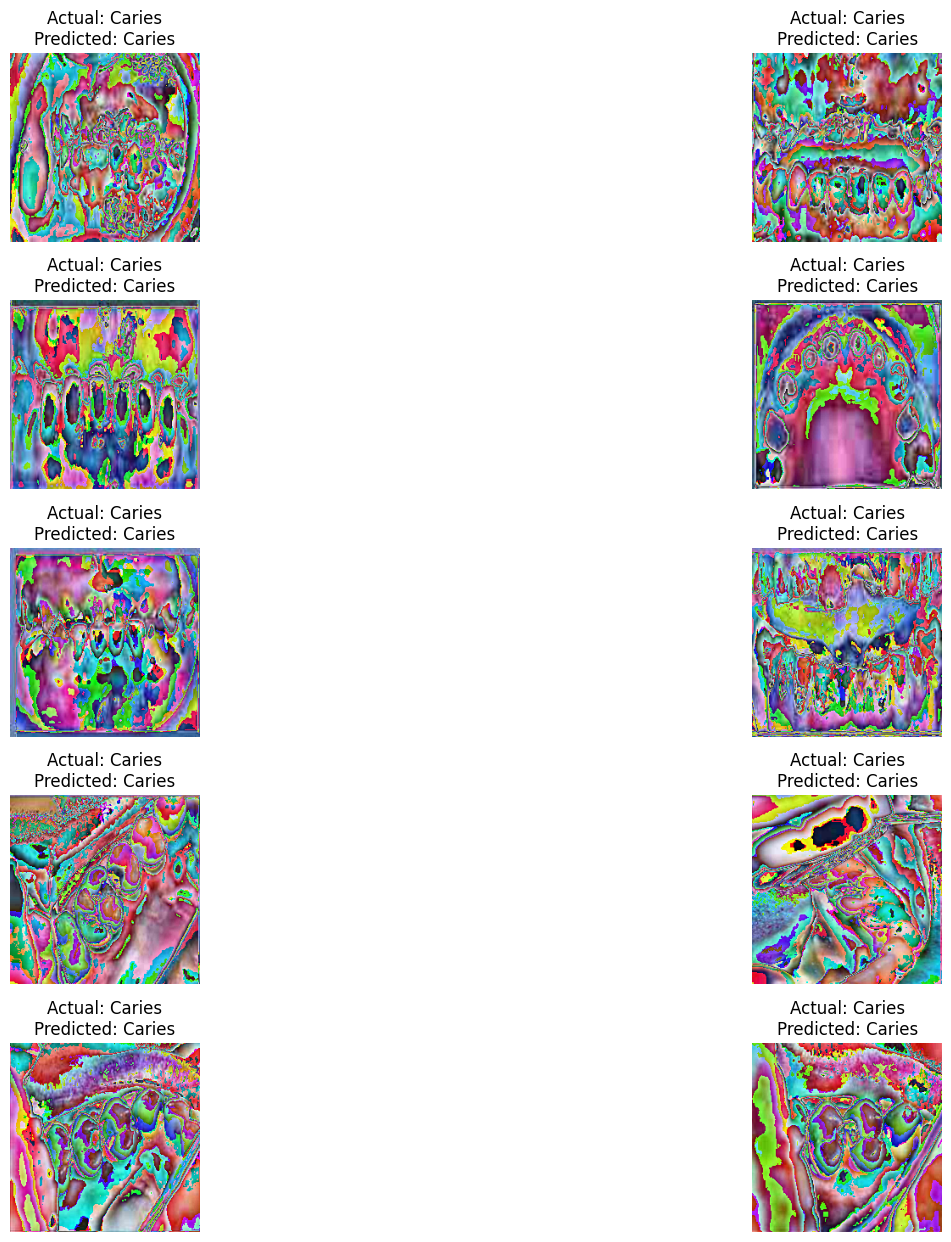

In [ ]:
class_mapping = {v: k for k, v in train_dataset.class_to_idx.items()}

# Visualize predictions on the test dataset
visualize_predictions(model, test_loader, class_mapping, num_images=10)